# 1. Understanding training data

In [2]:
# importing the library
import pandas as pd

In [1]:
# Read training_data
url  = '/home/alinemati/Yandex.Disk/Nirvana/database/'
data = pd.read_csv(url + "train.csv")
data.head(10)

NameError: name 'pd' is not defined

In [3]:
# Columns present in the training_data
for idx in range(1,len(data.columns)+1):
  print(idx," ",data.columns[idx-1])

1   battery_power
2   blue
3   clock_speed
4   dual_sim
5   fc
6   four_g
7   int_memory
8   m_dep
9   mobile_wt
10   n_cores
11   pc
12   px_height
13   px_width
14   ram
15   sc_h
16   sc_w
17   talk_time
18   three_g
19   touch_screen
20   wifi
21   price_range


In [4]:
list(data)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [5]:
# battery_power  : Total energy a battery can store in one time measured in mAh
# blue           : Has Bluetooth or not
# clock_speed    : the speed at which microprocessor executes instructions **
# dual_sim       : Has dual sim support or not
# fc             : Front Camera megapixels **
# four_g         : Has 4G or not
# int_memory     : Internal Memory in Gigabytes **
# m_dep          : Mobile Depth in cm **
# mobile_wt      : Weight of mobile phone **
# n_cores        : Number of cores of the processor
# pc             : Primary Camera megapixels **
# px_height      :Pixel Resolution Height **
# px_width       : Pixel Resolution Width **
# ram            : Random Access Memory in MegaBytes **
# sc_h           : Screen Height of mobile in cm **
# sc_w           : Screen Width of mobile in cm **
# talk_time      : the longest time that a single battery charge will last when you are
# three_g        : Has 3G or not
# touch_screen   : Has touch screen or not
# wifi           : Has wifi or not
# price_range    : This is the target variable with a value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# 2. Feature Engineering

# New Section

In [6]:
# Dealing with outliers
# Dealing with missing data
# Dealing with different types of data
# Dealing with impure data

# 2.1 Outliers

/home/alinemati/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alinemati/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


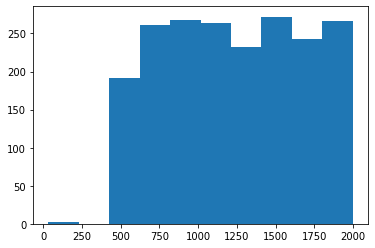

In [7]:
col_name = 'battery_power'

#Outlier in int_memory =400 , delete x<400 ... smaller outliers like the battery_power might be missing data
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data[col_name],bins=10)
plt.show()


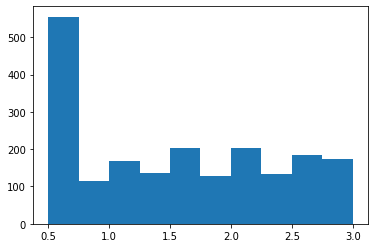

In [8]:
col_name = 'clock_speed'

#Outlier in int_memory =400 , delete x<400 ... smaller outliers like the battery_power might be missing data
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data[col_name],bins=10)
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


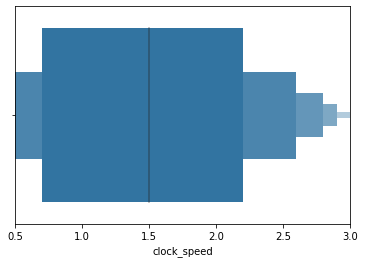

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xlim(min(data[col_name]), max(data[col_name]))
sns.boxenplot(data[col_name])


In [10]:
# clock_speed    : the speed at which microprocessor executes instructions **      : ? :
# battery_power  : Total energy a battery can store in one time measured in mAh ** : ? :
# fc             : Front Camera megapixels **                                      : ? :
# int_memory     : Internal Memory in Gigabytes **                                 : ? :
# m_dep          : Mobile Depth in cm **                                           : ? :
# mobile_wt      : Weight of mobile phone **                                       : ? :
# pc             : Primary Camera megapixels **                                    : ? :
# px_height      :Pixel Resolution Height **                                       : ? :
# px_width       : Pixel Resolution Width **                                       : ? :
# ram            : Random Access Memory in MegaBytes **                            : ? :
# sc_h           : Screen Height of mobile in cm **                                : ? :
# sc_w           : Screen Width of mobile in cm **                                 : ? :

In [11]:
import numpy as np
data = data[[True if (x<300) | (np.isnan(x)) else False for x in data['int_memory']]]

/home/alinemati/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alinemati/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


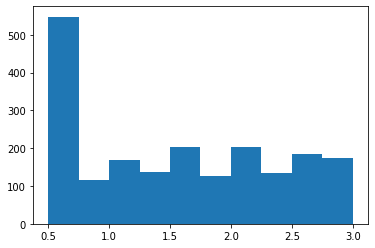

In [12]:


import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data[col_name],bins=10)
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


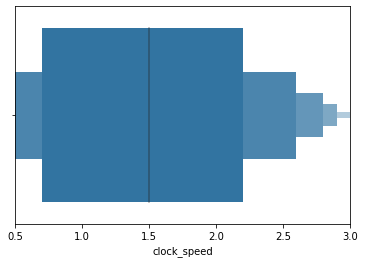

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xlim(min(data[col_name]), max(data[col_name]))
sns.boxenplot(data[col_name])


# 2.2 Missing Data

In [14]:
# Check for null values in all variables
data.isnull().sum()

battery_power    6
blue             4
clock_speed      7
dual_sim         6
fc               6
four_g           6
int_memory       7
m_dep            8
mobile_wt        7
n_cores          8
pc               7
px_height        8
px_width         5
ram              5
sc_h             4
sc_w             6
talk_time        6
three_g          5
touch_screen     3
wifi             9
price_range      0
dtype: int64

In [15]:
from sklearn.preprocessing import Imputer
import numpy as np
data_ = data.copy()

In [16]:
## Handling missing data
##Chose the most appropriate based on your judgement

# Dropping null values
data = data.dropna() 

# Replacing null with mean
data = data_.copy()
imputer = Imputer(missing_values=np.NAN, strategy="mean")
data.iloc[:,:] = imputer.fit_transform(data.iloc[:,:])


# Replacing null with most_frequent
# data = data_.copy()
data = data_.copy()
imputer = Imputer(missing_values=np.NAN, strategy="most_frequent")
data.iloc[:,:] = imputer.fit_transform(data.iloc[:,:])


# Replacing null with median
# data = data_.copy()
data = data_.copy()
imputer = Imputer(missing_values=np.NAN, strategy="median")
data.iloc[:,:] = imputer.fit_transform(data.iloc[:,:])



/home/alinemati/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/alinemati/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/alinemati/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# 2.3 Different types of variables

In [17]:
data.dtypes

battery_power    float64
blue             float64
clock_speed      float64
dual_sim         float64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time        float64
three_g          float64
touch_screen     float64
wifi             float64
price_range      float64
dtype: object

In [18]:
categorical_variables ={
    'battery_power': False,     # Total energy a battery can store in one time measured in mAh
    'blue': True,              # Has Bluetooth or not?
    'clock_speed': False,       # clock speed
    'dual_sim':True,          # has dual sim or not?
    'fc':False,                # Front Camera megapixels
    'four_g':True,            # Has 4G or not
    'int_memory':False,        # internal memory
    'm_dep': False,             # Mobile Depth in cm
    'mobile_wt':False,         # mobile weight
    'n_cores':False,           # no of cores 
    'pc':False,                # Primary Camera megapixels
    'px_height':False,         # Pixel resolution height
    'px_width':False,          # Pixel resolution width
    'ram':    False,          # Ram
    'sc_h':     False ,        # Screen Height of mobile in cm
    'sc_w':    False  ,        # Screen width of mobile in cm
  'talk_time': False  ,    # the longest time that a single battery charge will last when you are
    'three_g':     True,      # Has 3G or not
    'touch_screen': True ,    # Has touch screen or not
    'wifi':       True  ,      # Has wifi or not
}

In [19]:
def encode_column(df,column_name):
  unique_patterns = len(list(set(df[column_name])))
  pattern_dict = dict(zip(list(set(df[column_name])), range(unique_patterns)))
  res = []
  for idx in range(len(df)):
    temp = [0]*unique_patterns
    temp[pattern_dict[df.iloc[idx][column_name]]] = 1
    res.append(temp)
  return pd.DataFrame(res,columns=[str(x)+"_"+column_name for x in range(unique_patterns)])  

In [20]:
data['blue'].head(4)

0    1.0
1    1.0
2    1.0
3    0.0
Name: blue, dtype: float64

In [21]:
encode_column(data,'blue').head(4)

# for column_name in categorical_variables:
#   if categorical_variables[column_name] == True:
#     df = encode_column(data,column_name)
#     data = pd.concat([data,df],axis=1)
#     del data[column_name]

0_blue  1_blue
0       0       1
1       0       1
2       0       1
3       1       0

In [22]:
print(list(data))

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [23]:
data

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0             878.0   1.0          1.3       0.0  13.0     1.0        31.0   
1             827.0   1.0          0.6       1.0   9.0     1.0        35.0   
2            1703.0   1.0          0.5       0.0   5.0     1.0        23.0   
3            1891.0   0.0          2.8       0.0   7.0     1.0        37.0   
4             589.0   1.0          2.3       1.0   1.0     0.0        61.0   
...             ...   ...          ...       ...   ...     ...         ...   
1995         1375.0   0.0          2.9       0.0   2.0     0.0        20.0   
1996         1617.0   1.0          1.3       1.0   3.0     1.0        30.0   
1997          772.0   0.0          1.0       1.0   0.0     1.0        23.0   
1998          534.0   0.0          0.5       1.0   0.0     1.0        16.0   
1999          681.0   0.0          0.5       1.0  12.0     1.0        17.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0       0.5      153.0      4.0  ...      575.0     618.0  3497.0   9.0   7.0   
1       0.2       87.0      6.0  ...       23.0     826.0  2367.0   5.0   3.0   
2       0.2       92.0      6.0  ...      134.0     521.0   793.0   7.0   3.0   
3       0.4      129.0      7.0  ...      169.0    1108.0  3704.0   8.0   6.0   
4       0.6      160.0      4.0  ...      429.0     815.0  2113.0  13.0   7.0   
...     ...        ...      ...  ...        ...       ...     ...   ...   ...   
1995    0.4      147.0      6.0  ...      563.5     679.0  3847.0   8.0   0.0   
1996    0.7      105.0      2.0  ...      246.0    1038.0   829.0   9.0   0.0   
1997    0.6       97.0      7.0  ...      317.0    1805.0  2782.0   7.0   0.0   
1998    1.0      189.0      5.0  ...      393.0    1199.0  3926.0  16.0   5.0   
1999    0.9      194.0      5.0  ...      371.0    1702.0  2548.0  12.0   1.0   

      talk_time  three_g  touch_screen  wifi  price_range  
0          11.0      1.0           1.0   0.0          2.0  
1          15.0      1.0           0.0   1.0          1.0  
2          17.0      1.0           1.0   0.0          0.0  
3          11.0      1.0           0.0   0.0          3.0  
4           2.0      1.0           0.0   1.0          1.0  
...         ...      ...           ...   ...          ...  
1995       12.0      1.0           0.0   1.0          3.0  
1996       10.0      1.0           0.0   0.0          0.0  
1997       11.0      1.0           0.0   0.0          2.0  
1998       20.0      1.0           0.0   0.0          3.0  
1999        5.0      1.0           0.0   1.0          2.0  

[2000 rows x 21 columns]

In [24]:
data = data[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']]
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Train and Test split

In [25]:
# Split the data into training and test dataset
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
print("Number of training samples :",len(X_train))
print("Number of testing samples :",len(X_test))
print("Shape of training and test data :",X_train.shape)

Number of training samples : 1600
Number of testing samples : 400
Shape of training and test data : (1600, 20)


# Training


In [27]:
# Training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LR = LogisticRegression(random_state=0)
LR.fit(X_train,Y_train)
LR_pred = LR.predict(X_test)
accuracy_score(Y_test,LR_pred)

/home/alinemati/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alinemati/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7875

In [28]:
pd.DataFrame(X_train).head(4)

0    1    2    3     4    5     6    7      8    9    10     11  \
0  1782.0  1.0  2.8  1.0   6.0  1.0  58.0  0.8  157.0  1.0  13.0  867.0   
1  1379.0  1.0  2.1  1.0  14.0  1.0  63.0  1.0   83.0  1.0  17.0  207.0   
2  1056.0  1.0  2.1  1.0   8.0  1.0  37.0  0.7  101.0  3.0  11.0  914.0   
3  1396.0  1.0  0.6  0.0   0.0  0.0  37.0  0.7  134.0  4.0  15.0  560.0   

       12      13    14   15    16   17   18   19  
0   999.0  2405.0  15.0  0.0  16.0  1.0  0.0  1.0  
1  1370.0   651.0   9.0  6.0   7.0  1.0  1.0  0.0  
2   979.0  2651.0  15.0  5.0   3.0  1.0  1.0  1.0  
3  1177.0  2694.0  18.0  3.0  19.0  0.0  0.0  1.0

# Feature scaling & Training

In [ ]:
# Standard Scalar or normalize database
from sklearn.preprocessing import StandardScaler
stdSc = StandardScaler()
X_train = stdSc.fit_transform(X_train)
X_test = stdSc.transform(X_test)

In [ ]:
# result after feature scaling
pd.DataFrame(X_train).head(4)

In [ ]:
# Training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LR = LogisticRegression(random_state=0)
LR.fit(X_train,Y_train)
LR_pred = LR.predict(X_test)
accuracy_score(Y_test,LR_pred)

# Done 
# you need to run till Feature scaling & Training

# 2.4 Feature selection & Training

In [ ]:
#battery_power.  price
#H0: battery_power relevant column for price prediction
#HA: battery_power irrelevant column for price prediction
#p-value > critical value  Reject Hypothesis

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,Y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(10,'Score'))  #print 10 best features
print(featureScores.nlargest(4,'Score'))  #print 4 best features

           Specs          Score
7          m_dep  747608.537960
5         four_g   13424.946641
0  battery_power   10667.818093
6     int_memory    8267.189935


In [30]:
X_train = bestfeatures.fit_transform(X_train,Y_train)
X_test = bestfeatures.transform(X_test)

In [31]:
# Training
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train,Y_train)
XGB_pred = XGB.predict(X_test)
accuracy_score(Y_test,XGB_pred)

0.895